In [1]:
# Import necessary dependencies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.metrics import R2Score
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib as jb
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('/content/Flight_Price_Dataset_of_Bangladesh.csv')
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


# Data Exploration

In [3]:
# Show some info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

In [4]:
df.describe()

,Duration (hrs),Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000
mean,3.994955,58899.556573,11448.238494,71030.316199,45.460579
std,4.094043,68840.614499,12124.344329,81769.199536,26.015657
min,0.500000,1600.975688,200.000000,1800.975688,1.000000
25%,1.003745,8856.316983,200.000000,9602.699787,23.000000
50%,2.644656,31615.996792,9450.940481,41307.544990,45.000000
75%,5.490104,85722.930389,17513.046160,103800.906963,68.000000
max,15.831719,449222.933770,73383.440066,558987.332444,90.000000


In [5]:
# Show dataset shape
df.shape

(57000, 17)

In [6]:
# Check about none values to decide if we will make data cleaning or not
df.isnull().sum()

,0
Airline,0
Source,0
Source Name,0
Destination,0
Destination Name,0
Departure Date & Time,0
Arrival Date & Time,0
Duration (hrs),0
Stopovers,0
Aircraft Type,0


In [12]:
df = pd.read_csv('Flight_Price_Dataset_of_Bangladesh.csv')
# Now you can group by 'flight' and 'airline'
df1 = df.groupby(['Source Name', 'Airline'], as_index=False).count()
df1.Airline.value_counts()

,count
Airline,
Air Arabia,8
Air Astra,8
US-Bangla Airlines,8
Turkish Airlines,8
Thai Airways,8
SriLankan Airlines,8
Singapore Airlines,8
Saudia,8
Qatar Airways,8


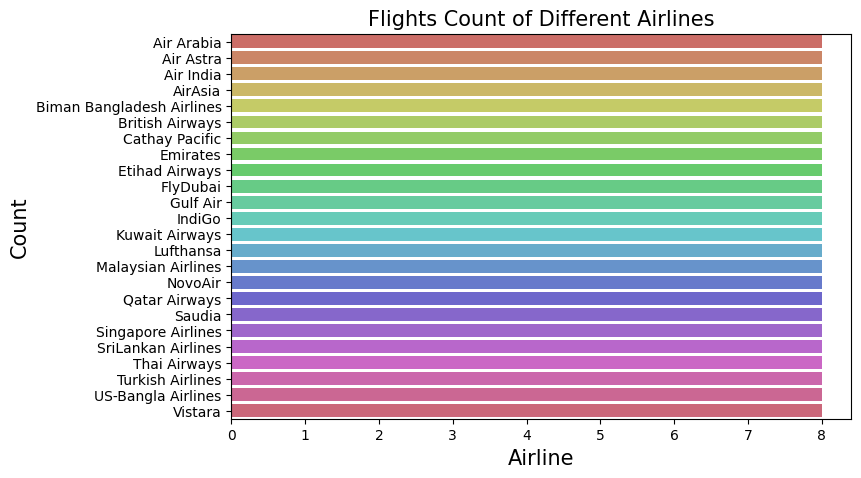

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(df1['Airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [16]:
df2=df.groupby(['Source Name','Airline','Class'],as_index=False).count()
df2['Class'].value_counts()

,count
Class,
Business,192
Economy,192
First Class,192


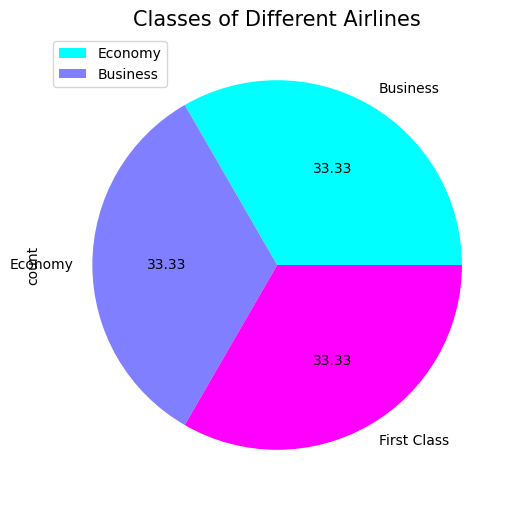

In [17]:
plt.figure(figsize=(8,6))
df2['Class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

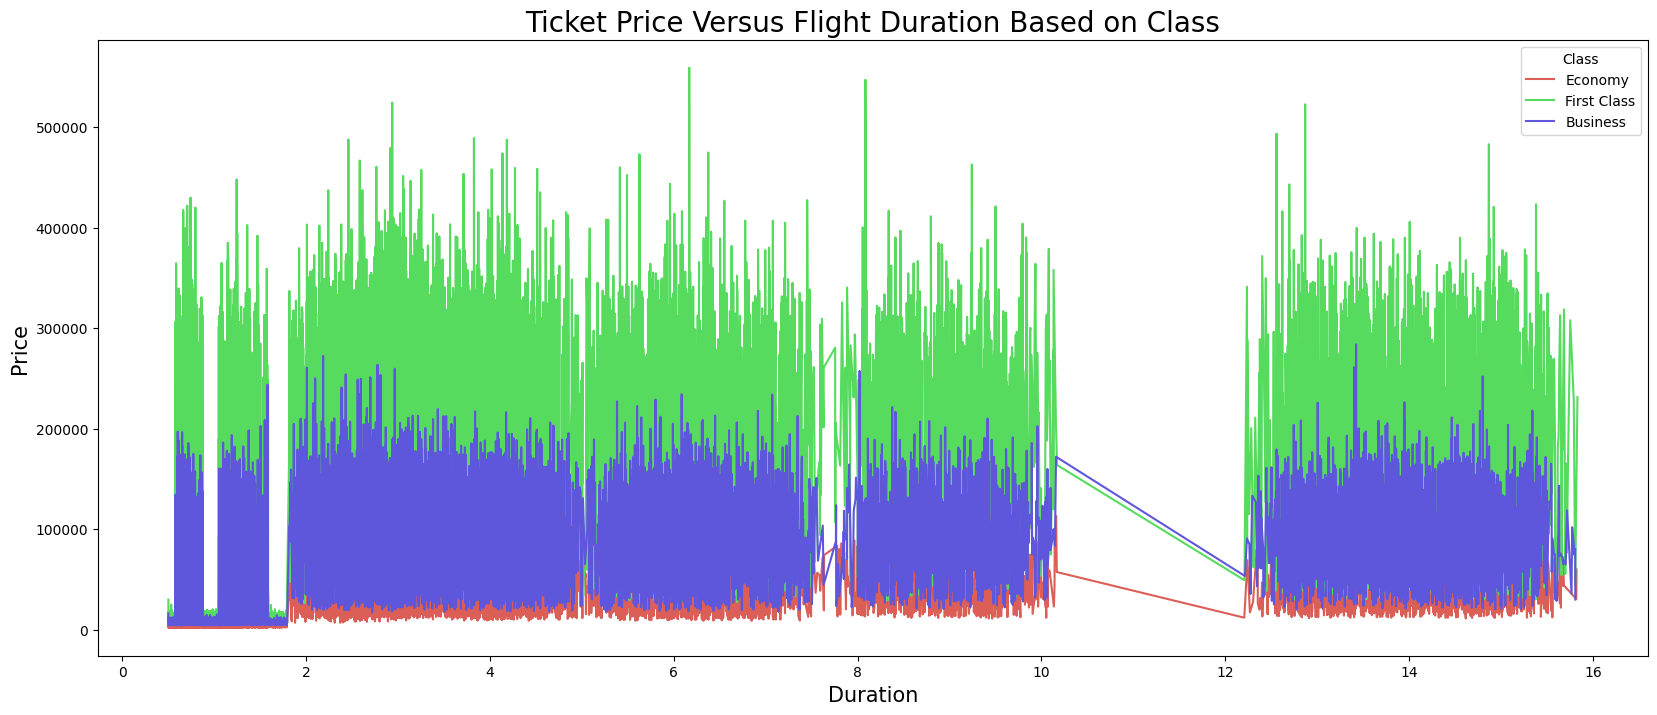

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Duration (hrs)',y='Total Fare (BDT)',hue='Class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [20]:
# Count values for each column
for col in df.columns:
  count_values = df[col].value_counts()
  print(f'Column called \033[91m{col}\033[0m has \033[94m{len(count_values)}\033[0m unique values')

Column called Airline has 24 unique values
Column called Source has 8 unique values
Column called Source Name has 8 unique values
Column called Destination has 20 unique values
Column called Destination Name has 20 unique values
Column called Departure Date & Time has 54126 unique values
Column called Arrival Date & Time has 56944 unique values
Column called Duration (hrs) has 53135 unique values
Column called Stopovers has 3 unique values
Column called Aircraft Type has 5 unique values
Column called Class has 3 unique values
Column called Booking Source has 3 unique values
Column called Base Fare (BDT) has 57000 unique values
Column called Tax & Surcharge (BDT) has 35969 unique values
Column called Total Fare (BDT) has 57000 unique values
Column called Seasonality has 4 unique values
Column called Days Before Departure has 90 unique values


Airline
US-Bangla Airlines           4496
Lufthansa                    2368
Vistara                      2368
FlyDubai                     2346
Biman Bangladesh Airlines    2344
Emirates                     2327
Saudia                       2321
Thai Airways                 2316
AirAsia                      2312
Air Astra                    2304
Malaysian Airlines           2292
Cathay Pacific               2282
Air India                    2280
Singapore Airlines           2279
NovoAir                      2268
Etihad Airways               2267
Qatar Airways                2267
Kuwait Airways               2262
Gulf Air                     2231
IndiGo                       2223
Turkish Airlines             2220
Air Arabia                   2217
British Airways              2209
SriLankan Airlines           2201
Name: count, dtype: int64

Source Name
Shah Amanat International Airport, Chittagong    7241
Osmani International Airport, Sylhet             7179
Jessore Airport              

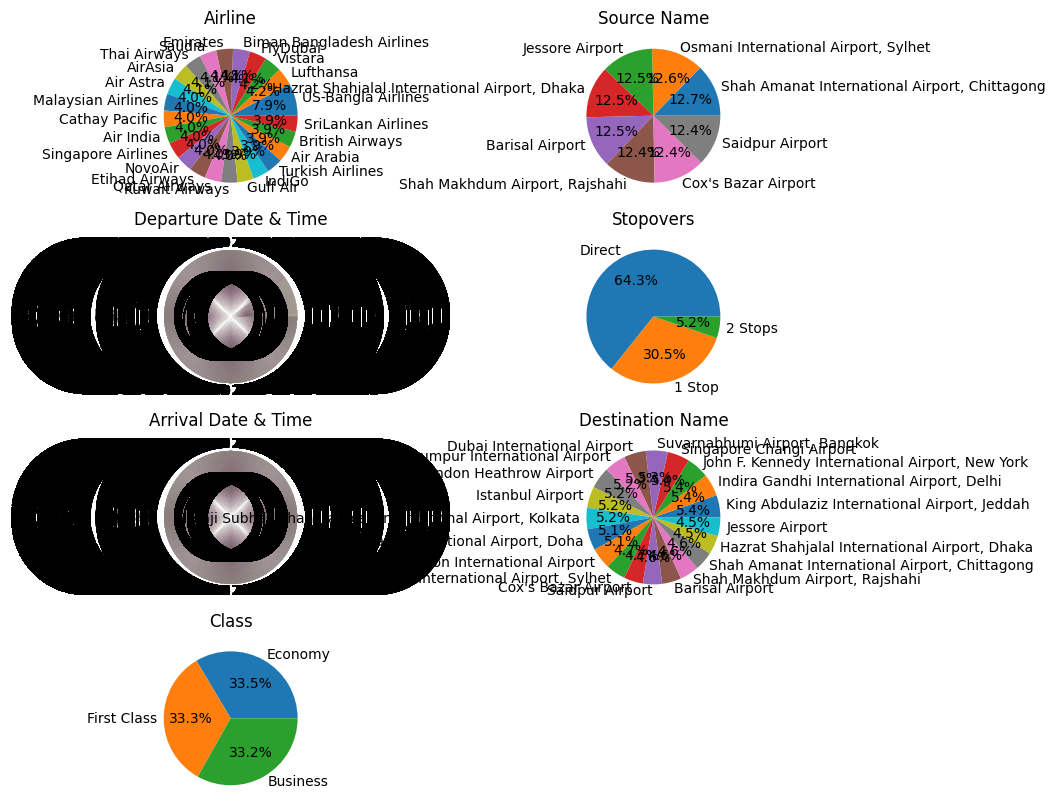

In [18]:
# Pie airline, source_city, departure_time, stops, arrival_time, destination_city and class columns
columns = ['Airline','Source Name','Departure Date & Time','Stopovers','Arrival Date & Time','Destination Name','Class']
plt.figure(figsize=(10,10))
for col in columns:
  count_values = df[col].value_counts()
  print(count_values,end='\n\n')
  plt.subplot(4,2,columns.index(col)+1)
  plt.title(col)
  plt.pie(count_values,labels=count_values.index,autopct='%1.1f%%')
  plt.axis('off')
plt.show()

In [ ]:
# Find minimum, maximum and the average duration of all flights
print(f'Maximum flight duration {df["duration"].max()}')
print(f'Minimum flight duration {df["duration"].min()}')
print(f'average flights duration {df["duration"].median()}')

# Data Preprocessing

In [ ]:
# Drop both of Unnamed: 0,
df_prep = df.drop(['Unnamed: 0', 'flight'],axis=1)
df_prep.head()

In [ ]:
# Convert class column into binary column
df_prep['class'] = df_prep['class'].apply(lambda x: 1 if x=='Business' else 0)
df_prep.head()

In [ ]:
# Convert stops columns into categorical column
df_prep['stops'] = df_prep['stops'].apply(lambda x: 0 if x=='zero' else 1 if x=='one' else 2)
df_prep

In [ ]:
# Show objects columns
df_prep.select_dtypes(include = ['object']).columns

In [ ]:
# Apply one hot encode for 	airline, source_city,	departure_time, arrival_time,	destination_city
dummied_columns = df_prep.select_dtypes(include = ['object']).columns
df_prep = pd.get_dummies(df_prep, columns = dummied_columns, drop_first=True)
df_prep

In [ ]:
# Create Correlation between features
correlation = df_prep.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")
plt.show()

# Modeling with Classical and ensemble Algorithms

In [ ]:
df_prep

In [ ]:
# Split data into input and label data
X = df_prep.drop(['price'], axis = 1)
Y = df_prep['price'].astype('float32')
print(f'X shape {X.shape}')
print(f'Y shape {Y.shape}')

In [ ]:
import numpy as np
Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y = (Y - Y_mean) / Y_std
Y[:3]

In [ ]:
X.columns

In [ ]:
X[:5]

In [ ]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 224)
print(f'x train shape {x_train.shape}')
print(f'x test shape {x_test.shape}')
print(f'y train shape {y_train.shape}')
print(f'y test shape {y_test.shape}')

In [ ]:
def plot_predictions(y_train, predicted_y_train, y_test, predicted_y_test):
    plt.figure(figsize = (10,10))
    plt.subplot(1,2,1)
    plt.title('Training Set: Actual vs Predicted Labels')
    plt.xlabel('train lables')
    plt.ylabel('predicted labels')
    plt.scatter(y_train, predicted_y_train,color='red',marker='X')
    plt.plot(range(int(min(y_train)), int(max(y_train))),color='black')
    plt.subplot(1,2,2)
    plt.title('Test Set: Actual vs Predicted Labels')
    plt.xlabel('test lables')
    plt.ylabel('predicted labels')
    plt.scatter(y_test, predicted_y_test,color='blue',marker='o')
    plt.plot(range(int(min(y_test)), int(max(y_test))),color='black')
    plt.show()

In [ ]:
# Train model and make it predict on test data
def train_model(model):
  model.fit(x_train, y_train)

  # Find model score
  train_score = model.score(x_train, y_train)
  test_score = model.score(x_test, y_test)
  print(f'Train score {train_score}, Test score {test_score}')

  # Make model predict on train and test data
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Evaluate the model using MSE and R square
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  print(f'MSE train {mse_train}, MSE test {mse_test}')

  # Plot actual and prediced labels
  # plot_predictions(y_train, y_train_pred, y_test, y_test_pred)

  return model, test_score

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(n_jobs=-1, criterion='friedman_mse', ),
    'ExtraTreesRegressor': ExtraTreesRegressor(n_jobs=-1, criterion='friedman_mse'),
    'AdaBoostRegressor': AdaBoostRegressor(learning_rate=0.01, loss='square'),
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(learning_rate=1e-2, max_iter=20000, max_leaf_nodes=127, verbose=0, max_features=0.8),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
}

In [ ]:
# Train each model and plot the results
all_trained_models = {}
all_trained_model_scores = {}
best_model = None
best_score = 0
for model_name, model in models.items():
  print(f'model {model_name}:')
  model, score = train_model(model)
  all_trained_models[model_name] = deepcopy(model)
  all_trained_model_scores[model_name] = score

  # Find the best model
  if score > best_score:
    best_model = deepcopy(model)
    best_score = score
    # Train and evaluate a Neural Network model
print("Training Neural Network...")
from sklearn.preprocessing import StandardScaler


# Scale the input data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# # Define the Neural Network model
nn_model = Sequential([
    Dense(256, input_dim=x_train.shape[1]),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.4),
    Dense(1)  # Output layer
])

# Compile the model
nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), loss='mse', metrics=['mae', R2Score()])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
lr_callback = keras.callbacks.ReduceLROnPlateau(factor=0.5)

# Train the model
nn_model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=150,
             batch_size=1024, callbacks=[early_stopping, lr_callback], verbose=1)

# Evaluate the model
train_loss, train_mae, train_r2score = nn_model.evaluate(x_train_scaled, y_train)
test_loss, test_mae, test_r2score = nn_model.evaluate(x_test_scaled, y_test)
all_trained_model_scores['ANN'] = test_r2score

print(f"Train Loss: {train_loss}, Train MAE: {train_mae}, Train Score: {train_r2score}")
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}, Test Score: {test_r2score}")

# Make predictions and plot
y_train_pred_nn = nn_model.predict(x_train_scaled).flatten()
y_test_pred_nn = nn_model.predict(x_test_scaled).flatten()
plot_predictions(y_train, y_train_pred_nn, y_test, y_test_pred_nn)


In [ ]:
df_1 = pd.read_csv('business.csv', index_col='date', parse_dates=['date'], date_format='%d-%m-%Y')
df_2 = pd.read_csv('economy.csv', index_col='date', parse_dates=['date'], date_format='%d-%m-%Y')

In [ ]:
df_1.head()

In [ ]:
df_2.head()

In [ ]:
df = pd.concat([df_1, df_2], axis=0)
df = df.sort_index()
df

In [ ]:
ts = df.groupby(df.index)['price'].aggregate(['count']).to_numpy().reshape(-1)
index = df.groupby(df.index)['price'].aggregate(['count']).index.to_numpy()

In [ ]:
index = index.astype('datetime64[D]')
print(index)
print(ts)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(ts, '.-')
plt.xticks(ticks=range(ts.shape[0]), labels=index, rotation=60, ha='right', va='top')
plt.ylim([0, int(ts.max()+ 0.1*ts.max())])
plt.grid('on')
plt.xlabel('Date', fontdict={'size': 16})
plt.ylabel('No. of Flights', fontdict={'size': 16})

for i, value in enumerate(ts):
    plt.text(i, value + 0.01 * ts.max(), f'{value:.0f}', ha='center', va='bottom', fontsize=10, rotation=60)



plt.title(f'No. of Flights per day from {index[0]} to {index[-1]}', fontdict={'size': 20, 'weight': 'bold'})

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their accuracies
model_names = list(all_trained_model_scores.keys())
accuracies = list(all_trained_model_scores.values())
# Create the table data as a list of lists (rows)
table_data = [[model, f'{accuracy:0.4f}'] for model, accuracy in zip(model_names, accuracies)]

# Create the table
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust figsize for larger table
table = ax.table(cellText=table_data, colLabels=['Model', 'Accuracy'], loc='center')

# Center align, increase font size, and adjust row height
for cell in table.get_celld().values():
    cell.set_text_props(ha='center', va='center', fontsize=14)
    cell.set_height(0.1)  # Adjust row height here

# Hide the axes
ax.axis('off')

# Display the table
plt.show()

In [ ]:
print(best_model)

# Save Model
The best model so far is the HistGradientBoostingRegressor model. It shows accuracy
0.9975
.


In [ ]:
from IPython.display import Image, display
from PIL import Image as PILImage

try:
    # Open the image using Pillow
    img = PILImage.open('1520066709922.jfif')

    # Convert the image to a supported format like JPEG
    img.save('temp_image.jpeg', 'jpeg')  # Save as JPEG

    # Display the converted image
    display(Image(filename='temp_image.jpeg'))

except FileNotFoundError:
    print("Image file not found.")
except Exception as e:
    print(f"An error occurred: {e}")